<a href="https://colab.research.google.com/github/klnsuman/ComputerVision/blob/main/handwritten_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

(<matplotlib.image.AxesImage at 0x7fe54025f2d0>, 5)

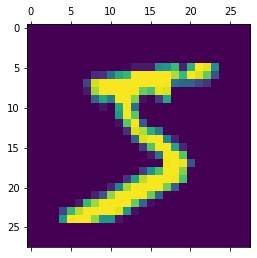

In [7]:
plt.matshow(X_train[0]),y_train[0]

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:

X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [10]:
X_train_flattened.shape

(60000, 784)

In [11]:

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4753 - accuracy: 0.8758
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3045 - accuracy: 0.9156
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2836 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2731 - accuracy: 0.9242
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2668 - accuracy: 0.9257


In [12]:

model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2706 - accuracy: 0.9256


[0.27059343457221985, 0.925599992275238]

In [13]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([2.2918791e-02, 2.8923387e-07, 4.9736321e-02, 9.5667934e-01,
       2.5253594e-03, 1.0842785e-01, 1.6101276e-06, 9.9983454e-01,
       1.4957401e-01, 6.8039119e-01], dtype=float32)

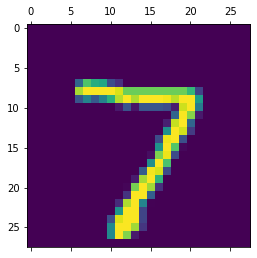

In [14]:

plt.matshow(X_test[0])

In [15]:
np.argmax(y_predicted[0])

7

In [18]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    1,    0,    5,    5,    3,    2,    0],
       [   0, 1104,    4,    2,    0,    1,    4,    2,   18,    0],
       [   7,    8,  917,   18,    6,    2,   11,   12,   47,    4],
       [   4,    0,   13,  933,    0,   16,    2,   12,   24,    6],
       [   2,    1,    6,    2,  901,    0,   12,    4,   12,   42],
       [  10,    1,    5,   42,    9,  759,   16,    8,   36,    6],
       [  13,    3,    7,    1,    7,    9,  913,    2,    3,    0],
       [   1,    5,   21,    7,    5,    0,    0,  956,    3,   30],
       [   5,    3,    6,   19,    9,   20,    9,   12,  886,    5],
       [  10,    7,    1,   11,   19,    5,    0,   22,   10,  924]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

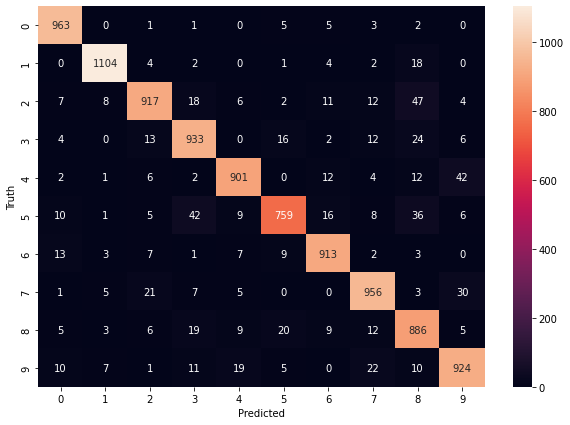

In [19]:

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(69.0, 0.5, 'Truth')

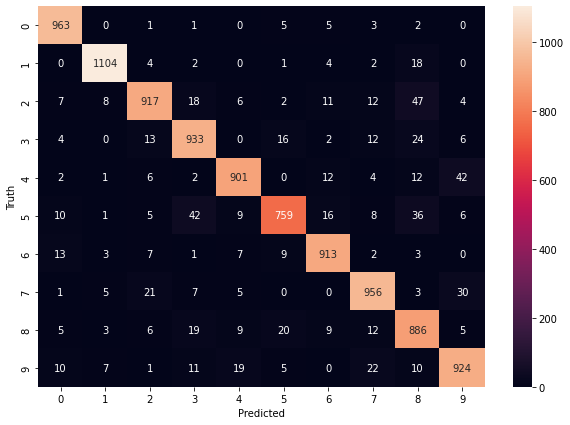

In [20]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [21]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2733 - accuracy: 0.9223
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1239 - accuracy: 0.9632
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0865 - accuracy: 0.9733
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0658 - accuracy: 0.9796
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0529 - accuracy: 0.9833


In [23]:

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)
model.evaluate(X_test,y_test)


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2743 - accuracy: 0.9218
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1236 - accuracy: 0.9641
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0848 - accuracy: 0.9746
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0650 - accuracy: 0.9804
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0516 - accuracy: 0.9840
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0413 - accuracy: 0.9870
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0341 - accuracy: 0.9890
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0275 - accuracy: 0.9917
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0230 - accuracy: 0.9929
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0829 

[0.08292603492736816, 0.9779000282287598]